Виробник зимових шин декларує, що вони прослужать в середньому 51500 кілометрівта середньоквадратичне відхилення в 4000 кілометрів. Якщо ви
придбаєте комплект таких шин, яка ймовірність, що вони
служитимуть принаймі 63 000 кілометрів? Який відсоток цих
шин прослужить менше ніж 45000? Між 45000 і 55000?
1. Якщо ви придбаєте комплект таких шин, яка ймовірність,
що вони служитимуть принаймі 63 000 кілометрів?

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




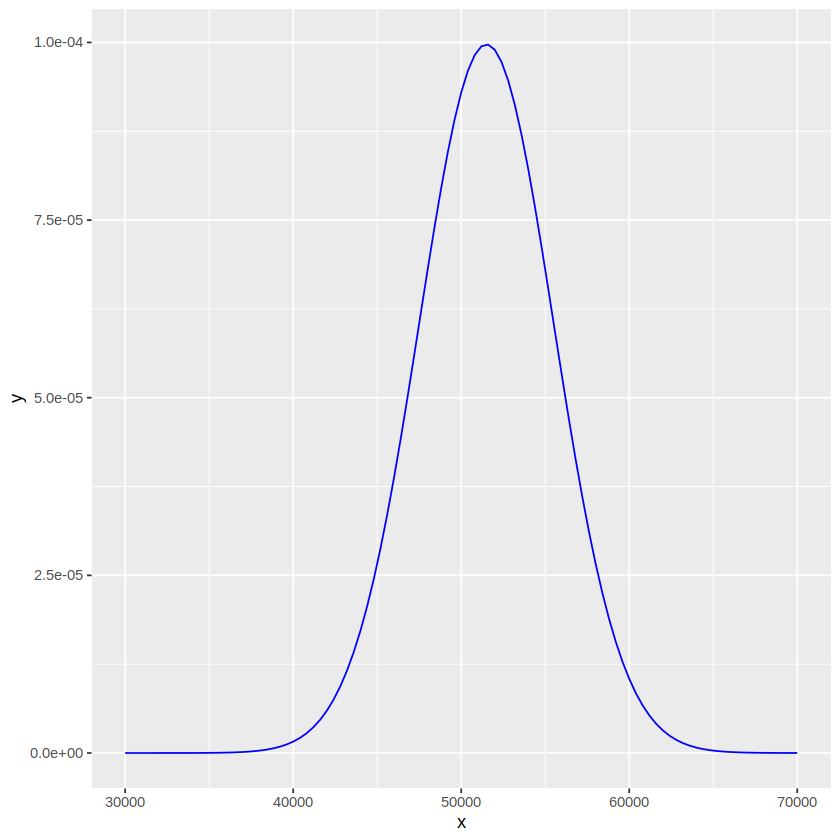

In [4]:
# Зобразимо наш розподіл:
ggplot(data.frame(x = c(30000,70000)), aes(x)) +
    stat_function(fun = dnorm, colour="blue", args = list(mean = 51500, sd = 4000))

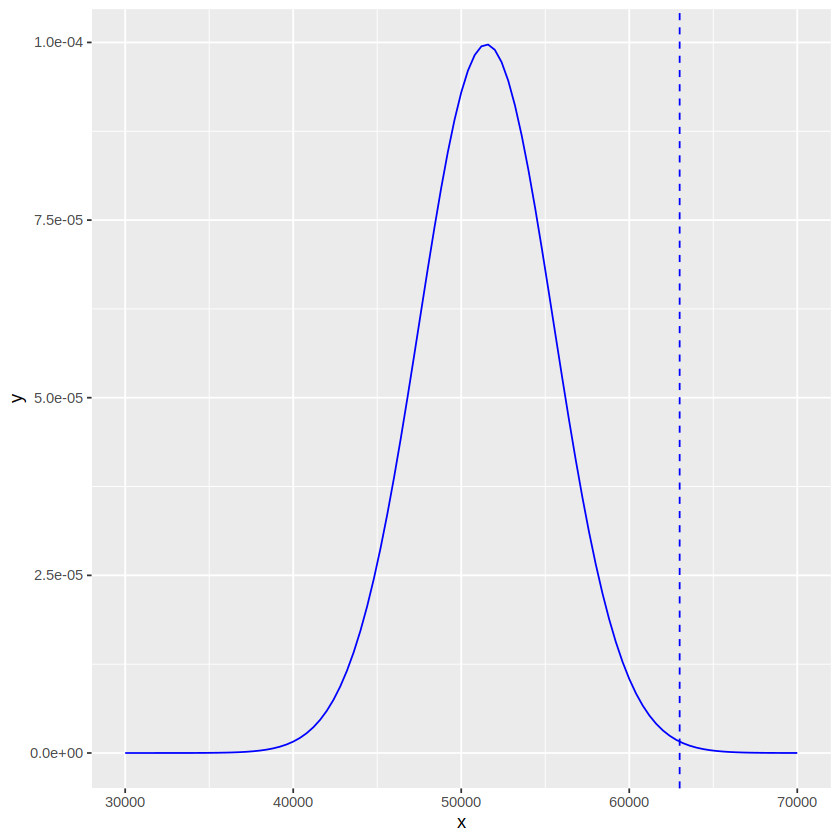

In [6]:
# Відмітимо область, яка нас цікавить:
ggplot(data.frame(x = c(30000,70000)), aes(x)) +
geom_vline(xintercept = 63000, linetype=2, colour="blue") +
stat_function(fun = dnorm, colour="blue", args = list(mean = 51500, sd = 4000))

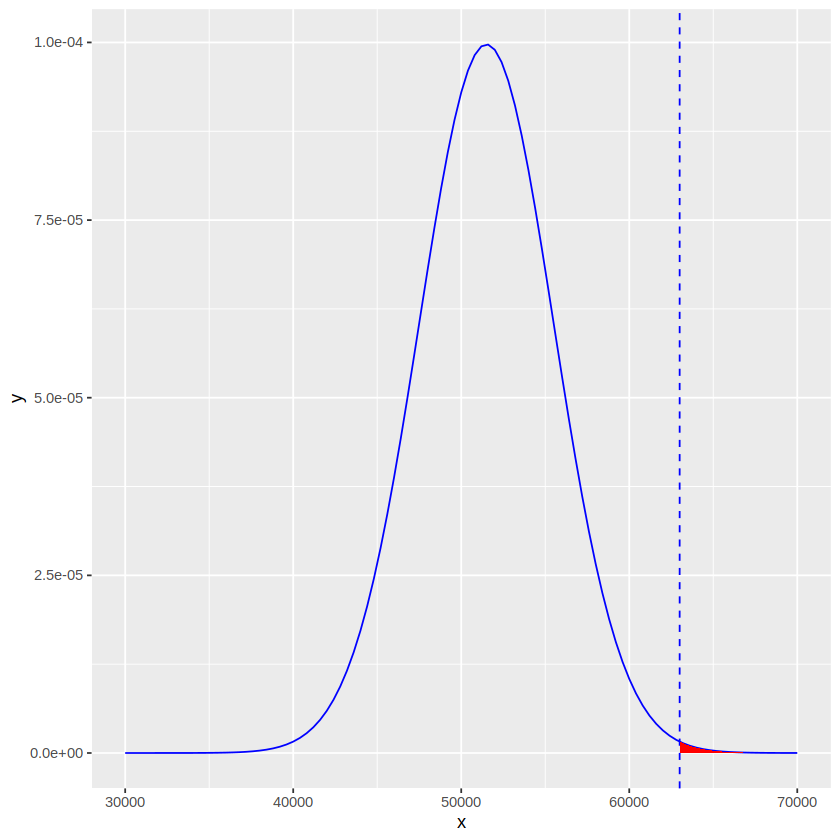

In [8]:
# Принаймі 63000 - це 63000 і більше, зобразимо цю площу під кривою:
ggplot(data.frame(x = c(30000,70000)), aes(x)) +
geom_vline(xintercept = 63000, linetype=2, colour="blue") +
stat_function(fun = dnorm, colour="blue", args = list(mean = 51500, sd = 4000)) +
geom_area(stat = "function", fun = dnorm, fill = "red", xlim = c(63000,70000), args = list(mean = 51500, sd = 4000))

Знаходимо z-значення для 63000 за формулою z = (x-µ)/σ = (63000-51500)/4000= 2.875
Для значення z=2.875 знайти ймовірність отримати таке ж
значення або більше з допомогою z-таблиць, або скористатися функцією pnorm в R:

In [11]:
pnorm(2.875, lower.tail = FALSE)

[1] 0.002020137

Параметр lower.tail означає що нас цікавить ймовірність
отримати значення більші, ніж 2.875.

In [14]:
# Також для функції pnorm можна не виконувати z-стандартизацію, а вказати параметри вашого розподілу:
pnorm(63000, mean=51500, sd=4000, lower.tail = FALSE)

[1] 0.002020137

Як бачимо, отримане значення становить 0.2%. Тобто
ймовірність, що шини цього виробника служитимуть принаймі
63000 досить мала.

Як перевірити чи розподіл є нормальним?
Можна побудувати гістограму, для оцінки форми розподілу.
Згенеруємо 1000 випадкових чисел, які мають нормальний
розподіл. Для цього скористаємося функцією rnorm (по
замовчуванню µ = 0, σ = 1)


In [18]:
x <- rnorm(1000)

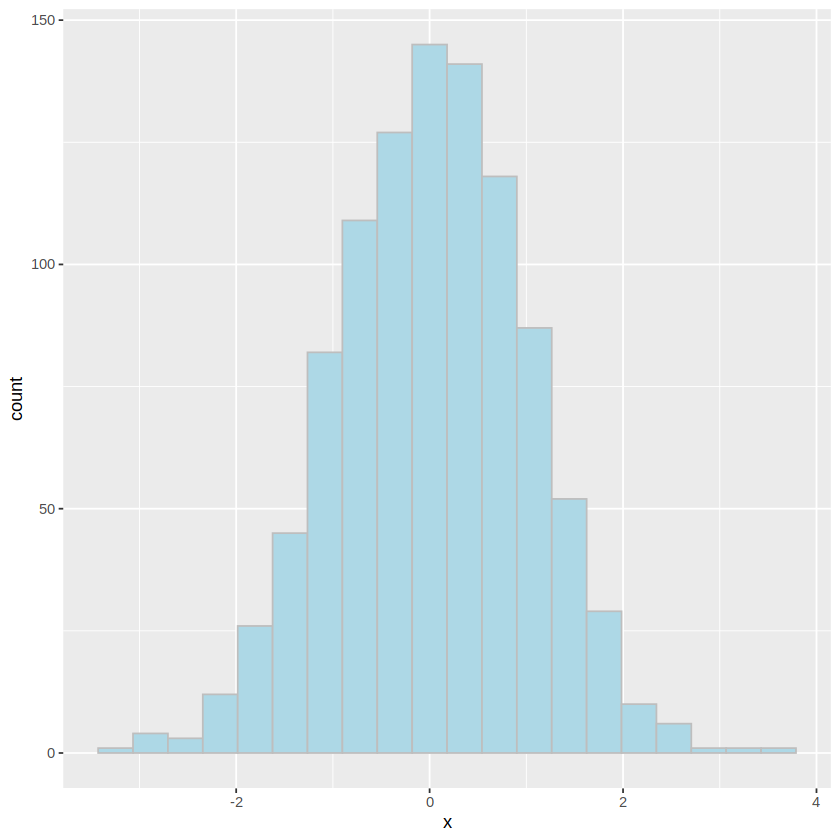

In [20]:
# Побудуємо гістограму:
ggplot(data.frame(x), aes(x)) +
geom_histogram(bins=20, color="grey", fill="lightblue")

Ще для оцінки форми розподілу можна використовувати так
званий density plot (відображає густину ймовірності):

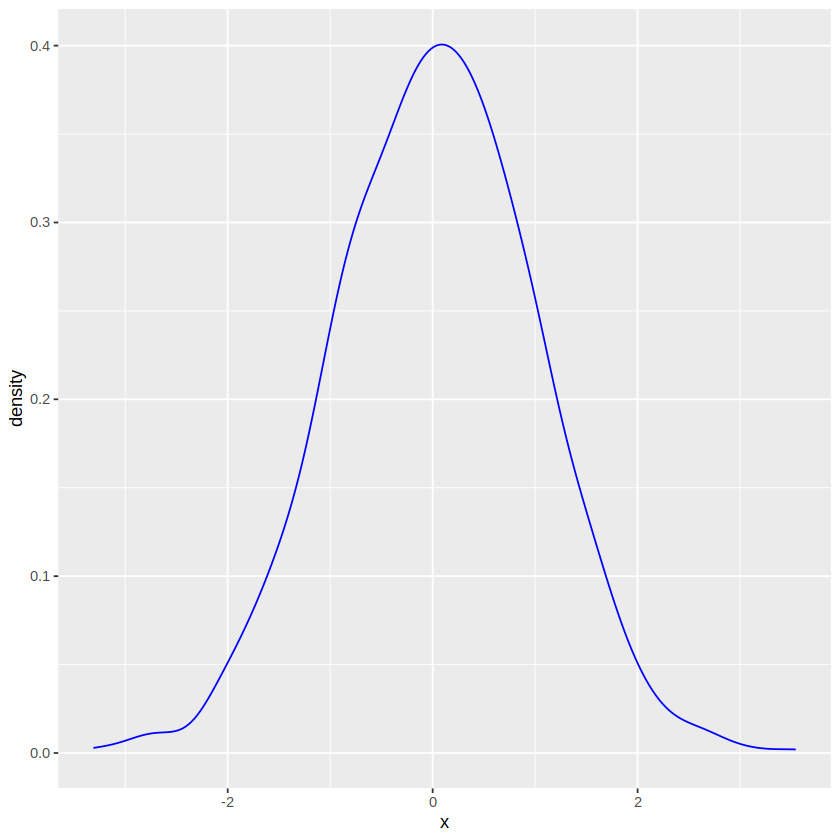

In [24]:
ggplot(data.frame(x), aes(x)) +
    geom_density(color = "blue")

Ще одна з технік візуального аналізу - quantile-quantile
plot(qqplot)

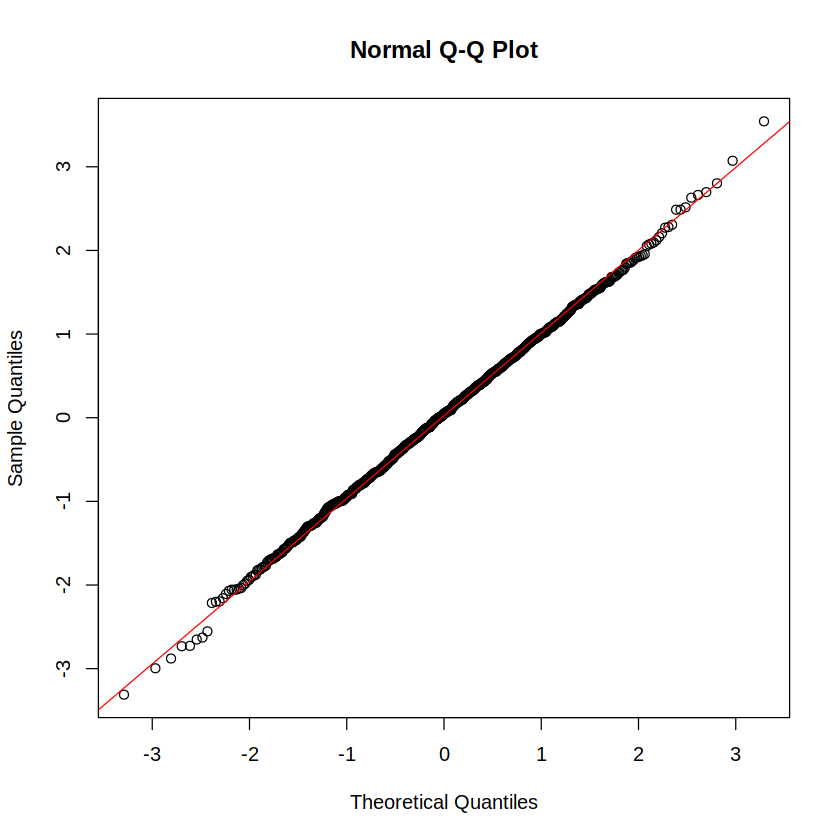

In [27]:
qqnorm(x)
qqline(x, col='red')

In [33]:
# Для бібліотеки ggplot2
y1 <- quantile(x, c(0.25, 0.75)) # Find the 1st and 3rd quartiles
x1 <- qnorm(c(0.25, 0.75)) # Find the matching normal values on the x-axis
slope <- diff(y1) / diff(x1) # Compute the line slope
int <- y1[1] - slope * x1[1] # Compute the line intercept

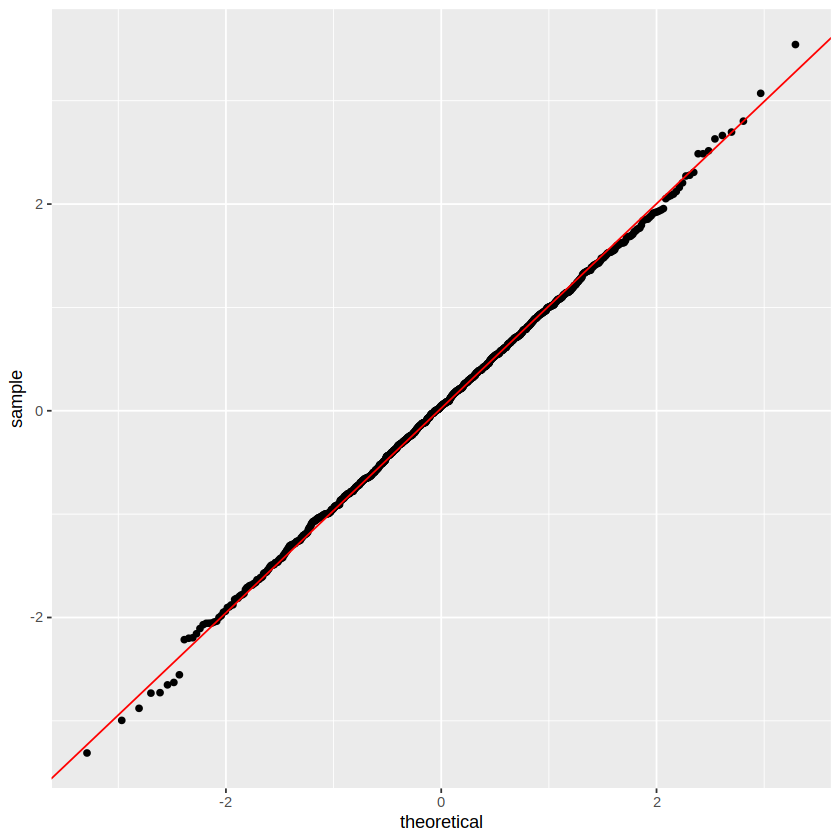

In [35]:
ggplot(data.frame(x), aes(sample = x)) +
    stat_qq() +
    geom_abline(intercept=int, slope=slope, col="red")

Якщо точки вашого розподілу розташовані по прямій, яка
позначена червоним кольором, можна стверджувати що ваш
розподіл співпадає з теоретичним нормальним розподілом.

Лінійна регресія

In [39]:
setwd("/home/olexandr/Documents/GitHub/Statistics_R/data_source")

In [41]:
anaconda <- read.csv("anaconda.dat", sep="", header = FALSE)

In [43]:
colnames(anaconda) <- c("Height", "Weight", "Sex")

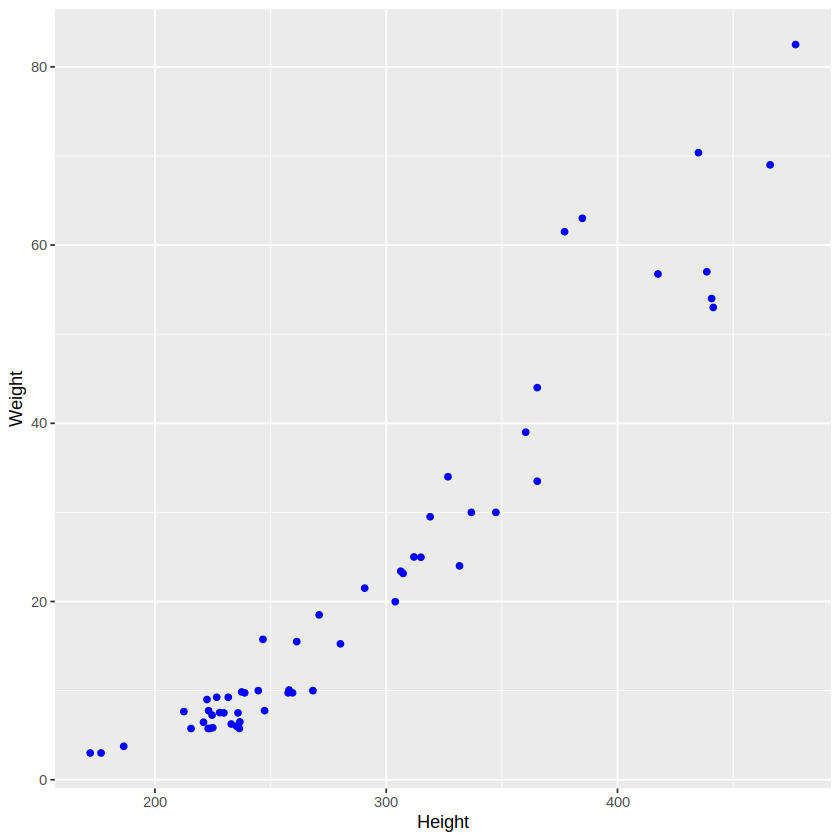

In [45]:
# Побудуємо графік розсіювання для наших даних:
ggplot(anaconda, aes(x=Height, y=Weight)) +
    geom_point(col="blue")

На основі цього графіка, можемо припустити, що є позитивна
лінійна залежність між довжиною та вагою дорослих анаконд.

In [48]:
# Знайдемао коефіцієнт кореляції:
cor(anaconda$Height, anaconda$Weight)

[1] 0.9613875

Дійсно, ці дві змінні мають сильну позитивну лінійну
залежність.

Лінійна регресія передбачає що ми побудуємо лінію, яка
якнайкраще описуватиме наші дані.Формула цієї лінії:
y = ax + b
де x - незалежна змінна (в нашому прикладі це довжина), y -
залежна змінна (вага анаконд).
a - це кут нахилу цієї прямої (slope)
b - точка перетину з y, де x = 0 (intercept)

Як знайти цб лінію? Через ці точки можна провести безліч
ліній, один з найчастіше вживаних для побудови "найкращої
лінії" - метод найменших квадратів. Серед всіх ліній,
найкращою ввжається та, сума квадратів залишків якої є
найменшою.

In [53]:
prediction_model <- lm(Weight ~ Height, data=anaconda)

In [55]:
# Для оцінки результатів лінійної моделі використовується функція summary:
summary(prediction_model)


Call:
lm(formula = Weight ~ Height, data = anaconda)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2050 -3.9127 -0.2454  1.9430 16.8067 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.730584   2.946034  -17.22   <2e-16 ***
Height        0.253047   0.009857   25.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.754 on 54 degrees of freedom
Multiple R-squared:  0.9243,	Adjusted R-squared:  0.9229 
F-statistic:   659 on 1 and 54 DF,  p-value: < 2.2e-16


a = 0.253, b =  -50.73. 
Weight = 0.253Height − 50.73
Це означає, що при збільшенні довжини на 1 см, вага
збільшується на 0.253 кг або ж 253 грами.

In [ ]:
# Також в ggplot2 (як і в базовому функціоналі R) лінію регресії можна додати до графіка розсіювання:
